In [1]:
# Parameters. Set defaults here.
# Times Square replaces this cell with the user's parameters.
record_limit = '999'

<a class="anchor" id="imports"></a>
## Imports and General Setup

In [2]:
# Only use packages available in the Rubin Science Platform
import requests
from collections import defaultdict
import pandas as pd
from pprint import pp, pformat
from urllib.parse import urlencode
from IPython.display import FileLink, display_markdown
from matplotlib import pyplot as plt
import os

In [3]:
env = 'usdf_dev'  # usdf-dev, tucson, slac, summit
log_name = 'narrativelog'
log = log_name
limit = int(record_limit)
response_timeout = 3.05  # seconds, how long to wait for connection
read_timeout = 20  # seconds

timeout = (float(response_timeout), float(read_timeout))

server = os.environ.get('EXTERNAL_INSTANCE_URL', 
                         'https://tucson-teststand.lsst.codes')
service = f'{server}/{log}'
service

'https://tucson-teststand.lsst.codes/narrativelog'

<a class="anchor" id="setup_source"></a>
## Setup Source

In [4]:
md = f'### Will retrieve from {service}'
display_markdown(md, raw=True)

### Will retrieve from https://tucson-teststand.lsst.codes/narrativelog

In [5]:
recs = None
ok = True

# is_human=either&is_valid=either&offset=0&limit=50' 
# site_ids=tucson&message_text=wubba&min_level=0&max_level=999&user_ids=spothier&user_agents=LOVE
# tags=love&exclude_tags=ignore_message
qparams = dict(is_human='either',
               is_valid='either',
               limit=limit,
              )
qstr = urlencode(qparams)
url = f'{service}/messages?{qstr}'

ignore_fields = set(['tags', 'urls', 'message_text', 'id', 'date_added', 
                     'obs_id', 'day_obs', 'seq_num', 'parent_id', 'user_id',
                     'date_invalidated', 'date_begin', 'date_end',
                     'time_lost', # float
                     #'systems','subsystems','cscs',  # values are lists, special handling
                    ])

In [6]:
display_markdown(f'## Get (up to {limit}) Records', raw=True)

## Get (up to 999) Records

In [7]:
# TODO Often fails on first request.  Find out why!
try:
    response = requests.get(url, timeout=timeout)
except:
    pass 
    
try:
    print(f'Attempt to get logs from {url=}')
    response = requests.get(url, timeout=timeout)
    response.raise_for_status()
    recs = response.json()
    flds = set(recs[0].keys())
    facflds = flds - ignore_fields
    # facets(field) = set(value-1, value-2, ...)
    facets = {fld: set([str(r[fld])
                for r in recs if not isinstance(r[fld], list)]) 
                    for fld in facflds}
except Exception as err:
    ok = False
    print(f'ERROR getting {log} from {env=} using {url=}: {err=}')
numf = len(flds) if ok else 0
numr = len(recs) if ok else 0
print(f'Retrieved {numr} records, each with {numf} fields.')

Attempt to get logs from url='https://tucson-teststand.lsst.codes/narrativelog/messages?is_human=either&is_valid=either&limit=999'
Retrieved 138 records, each with 24 fields.


<a class="anchor" id="table"></a>
## Tables of (mostly raw) results

### Fields names provided in records from log.

In [8]:
pd.DataFrame(flds, columns=['Field Name'])

,Field Name
0,is_human
1,category
2,date_invalidated
3,parent_id
4,time_lost
5,systems
6,components
7,id
8,primary_hardware_components
9,cscs


### Facets from log records.
A *facet* is the set all of values found for a field in the retrieved records. Facets are only calculated for some fields.

In [9]:
display(pd.DataFrame.from_dict(facets, orient='index'))
display(facets)

,0,1,2
time_lost_type,fault,None,None
systems,None,None,None
components,None,None,None
is_human,True,False,None
category,None,None,None
primary_software_components,None,None,None
user_agent,make_log_entry,string,LOVE
is_valid,True,False,None
level,100,0,None
primary_hardware_components,None,None,None


{'time_lost_type': {'None', 'fault'},
 'systems': {'None'},
 'components': {'None'},
 'is_human': {'False', 'True'},
 'category': {'None'},
 'primary_software_components': {'None'},
 'user_agent': {'LOVE', 'make_log_entry', 'string'},
 'is_valid': {'False', 'True'},
 'level': {'0', '100'},
 'primary_hardware_components': {'None'},
 'site_id': {'tucson'},
 'cscs': {'None'},
 'subsystems': {'None'}}

### Table of selected log record fields.
Table can be retrieved as CSV file for local use.

In [10]:
cols = ['date_added', 'time_lost']
df = pd.DataFrame(recs)[cols]

# Allow download of CSV version of DataFrame
csvfile = 'tl.csv'
df.to_csv(csvfile)
myfile = FileLink(csvfile)
print('Table available as CSV file: ')
display(myfile)
df

Table available as CSV file: 


/home/pothiers/sandbox/ts_logging_and_reporting/notebooks_tsqr/tl.csv

,date_added,time_lost
0,2024-08-15T17:54:06.567418,0.00
1,2023-01-19T22:57:39.561293,0.00
2,2024-08-16T14:50:09.507073,0.00
3,2023-07-19T15:28:22.027900,24.00
4,2024-08-15T18:08:13.548059,0.00
...,...,...
133,2022-11-30T02:19:07.316785,0.00
134,2024-08-16T15:03:39.996473,0.00
135,2023-05-09T17:26:25.052487,24.01
136,2024-08-15T20:02:54.299998,0.00


In [11]:
df = pd.DataFrame(recs)
df

,id,site_id,message_text,level,tags,urls,time_lost,date_begin,user_id,user_agent,...,parent_id,systems,subsystems,cscs,date_end,components,primary_software_components,primary_hardware_components,category,time_lost_type
0,01806d0e-c21a-4e2e-8a53-1db4e8f88c0b,tucson,Wubba. Using do_makeLogEntry; vr=0.1,0,"[watcher, alarm]",[],0.00,2024-08-15T12:44:06.456000,admin@love1.tu.lsst.org,LOVE,...,None,[ObservatorySoftwareTools],[LOVE],[],2024-08-15T12:44:06.456000,None,None,None,None,None
1,05b046b7-1266-47a9-b1de-93b6d44af242,tucson,,0,[],[],0.00,2023-01-19T22:50:03.167000,admin@love1.tu.lsst.org,LOVE,...,None,[],[],[],2023-01-19T22:50:03.167000,None,None,None,None,None
2,0656b9b5-ccf5-48d2-a712-7e78dd26a64d,tucson,Wubba. Using do_makeLogEntry {vr=},0,"[watcher, alarm, wubba]",[],0.00,2024-08-16T14:49:32.376667,admin@love1.tu.lsst.org,LOVE,...,None,[ObservatorySoftwareTools],[LOVE],[],2024-08-16T14:49:32.376667,None,None,None,None,None
3,0829537a-9cef-4f93-8566-7d66532e2184,tucson,Narrative log test,0,"[observatorysoftwaretools, love]",[],24.00,2023-07-18T15:24:01.754000,admin@love1.tu.lsst.org,LOVE,...,None,[ObservatorySoftwareTools],[LOVE],[],2023-07-19T15:24:01.754000,None,None,None,None,None
4,08d53806-964c-45cc-981b-d4920b5a1763,tucson,Wubba. Using do_makeLogEntry; vr=0.1,0,"[watcher, alarm]",[],0.00,2024-08-15T12:44:06.456000,admin@love1.tu.lsst.org,LOVE,...,None,[ObservatorySoftwareTools],[LOVE],[],2024-08-15T12:44:06.456000,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,f73cd42f-543f-4ac7-bfad-a572808e1305,tucson,ComCam is whack.,0,[],[],0.00,2022-11-29T02:17:35.179000,admin@love1.tu.lsst.org,LOVE,...,None,[ComCam],[Hardware],[],2022-11-30T02:17:35.179000,None,None,None,None,None
134,f7594406-2ff7-4d9e-9063-3b768e971b1b,tucson,Wubba. Using do_makeLogEntry {vr=},0,"[watcher, alarm, wubba]",[],0.00,2024-08-16T15:03:02.869590,admin@love1.tu.lsst.org,LOVE,...,None,[ObservatorySoftwareTools],[LOVE],[],2024-08-16T15:03:02.869590,None,None,None,None,None
135,f9e93e6a-9d13-471e-aa61-215769f56653,tucson,Inria narrative log test 3,0,"[observatorysoftwaretools, love]",[],24.01,2023-05-08T17:24:56.463000,admin@love1.tu.lsst.org,LOVE,...,None,[ObservatorySoftwareTools],[LOVE],[],2023-05-09T17:25:33.463000,None,None,None,None,None
136,fe5c59d7-6e34-4144-abe6-48f398a1d45d,tucson,Wubba. Using do_makeLogEntry; vr=0.2,0,"[watcher, alarm]",[],0.00,2024-08-15T12:54:06.456000,admin@love1.tu.lsst.org,LOVE,...,None,[ObservatorySoftwareTools],[LOVE],[],2024-08-15T12:54:06.456000,None,None,None,None,None


<a class="anchor" id="plot"></a>
## Plots from log

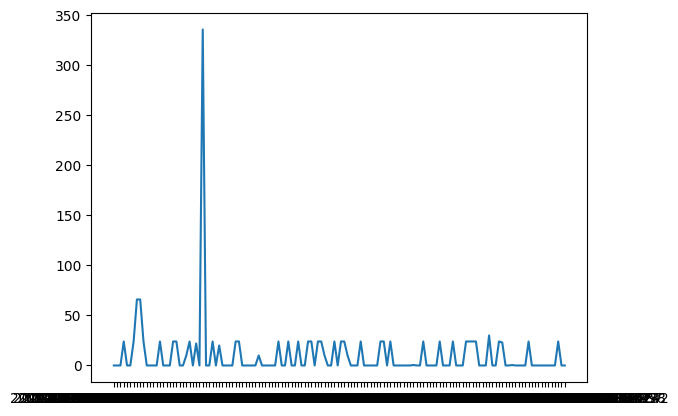

In [12]:
x = [r['date_added'] for r in recs]
y = [r['time_lost'] for r in recs]
plt.plot(x, y) 
plt.show()

<a class="anchor" id="raw_analysis"></a>
## Raw Content Analysis

### Example of one record

In [13]:
rec = recs[-1]

msg = rec["message_text"]
md = f'Message text from log:\n> {msg}'
display_markdown(md, raw=True)

display(rec)

Message text from log:
> Testing ampersan &Test&


{'id': 'ffc0ff27-76a3-4364-b3d3-05ca6aab0fd5',
 'site_id': 'tucson',
 'message_text': 'Testing ampersan &Test&\r\n',
 'level': 0,
 'tags': [],
 'urls': [],
 'time_lost': 0.0,
 'date_begin': '2024-08-23T18:15:55.678000',
 'user_id': 'saranda@tucson-teststand.lsst.codes',
 'user_agent': 'LOVE',
 'is_human': True,
 'is_valid': True,
 'date_added': '2024-08-23T18:16:32.716742',
 'date_invalidated': None,
 'parent_id': None,
 'systems': None,
 'subsystems': None,
 'cscs': None,
 'date_end': '2024-08-23T18:15:55.678000',
 'components': None,
 'primary_software_components': ['None'],
 'primary_hardware_components': ['None'],
 'category': 'None',
 'time_lost_type': 'fault'}

<a class="anchor" id="elicitation"></a>
## Stakeholder Elicitation

In [15]:
#EXTERNAL_INSTANCE_URL
ed = dict(os.environ.items())
with pd.option_context('display.max_rows', None,):
    print(pd.DataFrame(ed.values(), index=ed.keys()))

                                                                               0
SHELL                                                                  /bin/bash
SESSION_MANAGER                local/chimp20:@/tmp/.ICE-unix/6143,unix/chimp2...
QT_ACCESSIBILITY                                                               1
XDG_CONFIG_DIRS                                       /etc/xdg/xdg-mate:/etc/xdg
XDG_SESSION_PATH                        /org/freedesktop/DisplayManager/Session0
GTK_IM_MODULE                                                               ibus
LANGUAGE                                                                   en_US
TERMCAP                                                                         
SSH_AUTH_SOCK                                         /run/user/1000/keyring/ssh
INSIDE_EMACS                                                         29.4,comint
XMODIFIERS                                                              @im=ibus
DESKTOP_SESSION             